# **SAC Pranz24 Simulation**


----

In [ ]:
# Force the correct environment for CityLearn and Hydra on Colab
!pip uninstall -y numpy tensorboard tensorflow
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.3
!pip install hydra-core
!pip install citylearn
!pip install omegaconf
!pip install colorednoise
!pip install mujoco

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 139.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 47.5 MB/s eta 0:00:0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 155.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Import list**

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/src')

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import *
from citylearn.wrappers import *

# Data structure import
import pandas as pd
from datetime import datetime

# Plot import
from IPython.display import display, Markdown
from utils import plotting_functions as plt

# import for using model-based agents
# initialize Hydra in programmatic mode
from hydra import initialize, compose
import numpy as np
import omegaconf
import torch

# Work directory setter
import os, shutil
os.chdir('/content/drive/MyDrive/Colab Notebooks/src/agents/model_based')

import agents.model_based.mbrl.algorithms.sac as sac
import agents.model_based.mbrl.util.env as env_util

<module 'agents.model_based.mbrl.algorithms.sac' from '/content/drive/MyDrive/Colab Notebooks/src/agents/model_based/mbrl/algorithms/sac.py'>

In [ ]:
def run(cfg: omegaconf.DictConfig, test_cfg: omegaconf.DictConfig = None):
    print(f"Using the following algorithm: {cfg.algorithm.name}!")
    env, term_fn, reward_fn = env_util.EnvHandler.make_env(cfg, test_env=False)
    print(f"Using the following reward function: {reward_fn.__class__.__name__}")
    np.random.seed(cfg.seed)
    torch.manual_seed(cfg.seed)
    test_env, *_ = env_util.EnvHandler.make_env(test_cfg, test_env=True)
    sac.train(env, test_env, term_fn, cfg, work_dir="./exp/sac")
    return env,test_env

# Clean Hydra
from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()
# Load cfg
initialize(config_path="./mbrl/examples/conf")
cfg = compose(config_name="main_sac")
test_cfg = compose(config_name="test_mbpo")  # I can use test_mbpo, doesn't change
# Clean previous result
[shutil.rmtree(p) if os.path.isdir(p) else os.unlink(p) for p in [os.path.join('./exp/sac', f) for f in os.listdir('./exp/sac')]]
# Run agent
env, test_env = run(cfg, test_cfg)

22330
1024
False
719
0.005
True
Using the following algorithm: sac!
Using the following reward function: SolarPenaltyAndComfortReward
Using SAC Final
| train          | S: 100 | BR: -50.3725 | ALOSS: 31.3118 | TENTR: -9.0000 | CLOSS: 2908.4967 | TLOSS: -0.1270 | ALPHA: 0.9854 | AENTR: -0.4876
| train          | S: 200 | BR: -51.6331 | ALOSS: 42.4512 | TENTR: -9.0000 | CLOSS: 2403.4607 | TLOSS: -0.4004 | ALPHA: 0.9555 | AENTR: -0.1560
| train          | S: 300 | BR: -53.4361 | ALOSS: 40.8216 | TENTR: -9.0000 | CLOSS: 2385.3785 | TLOSS: -0.3455 | ALPHA: 0.9290 | AENTR: -4.0202
| train          | S: 400 | BR: -53.5808 | ALOSS: 27.4632 | TENTR: -9.0000 | CLOSS: 1546.1888 | TLOSS: 0.0607 | ALPHA: 0.9235 | AENTR: -9.7641
| train          | S: 500 | BR: -53.4360 | ALOSS: 27.9360 | TENTR: -9.0000 | CLOSS: 1015.1728 | TLOSS: 0.0504 | ALPHA: 0.9267 | AENTR: -9.6615
| train          | S: 600 | BR: -53.5464 | ALOSS: 29.1520 | TENTR: -9.0000 | CLOSS: 734.5877 | TLOSS: 0.0598 | ALPHA: 0.9302 | AENTR


----

## **Cost Function and building parameter**



In [ ]:
env = env.unwrapped
eval_env = test_env.unwrapped
display(eval_env.time_step)

# Setting benchmark building
num_building = 0

2207

In [ ]:
kpis_names = {
    'electricity_consumption_total': 'Total grid consumption',
    'carbon_emissions_total': 'Emissions',
    'discomfort_proportion': 'Proportion of time outside comfort range',
    'daily_peak_minus_load_factor_average': 'Measure of inefficiency in daily power usage',
    'daily_peak_average': 'Average daily peak',
    'all_time_peak_average': 'Maximum district consumption peak',
    'one_minus_thermal_resilience_proportion': 'Discomfort proportion during power outages',
    'power_outage_normalized_unserved_energy_total': 'Unmet demand due to energy shortage',
    'ramping_average': 'Average difference between current and previous timestep consumption',
    # Here to add cost function
}

display(Markdown(f"### **SAC - Base Version**"))
display(Markdown("----"))

kpis = eval_env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)

name,Building_1,Building_2,Building_3,District
cost_function,,,,
all_time_peak_average,NaN,NaN,NaN,0.980
carbon_emissions_total,0.845,1.116,0.882,0.948
daily_peak_average,NaN,NaN,NaN,0.933
discomfort_proportion,0.037,0.023,0.050,0.037
electricity_consumption_total,0.846,1.114,0.882,0.948
one_minus_thermal_resilience_proportion,0.231,0.462,0.167,0.286
power_outage_normalized_unserved_energy_total,0.528,0.647,0.501,0.559
ramping_average,NaN,NaN,NaN,0.925



------

## **Consumption Behavior**

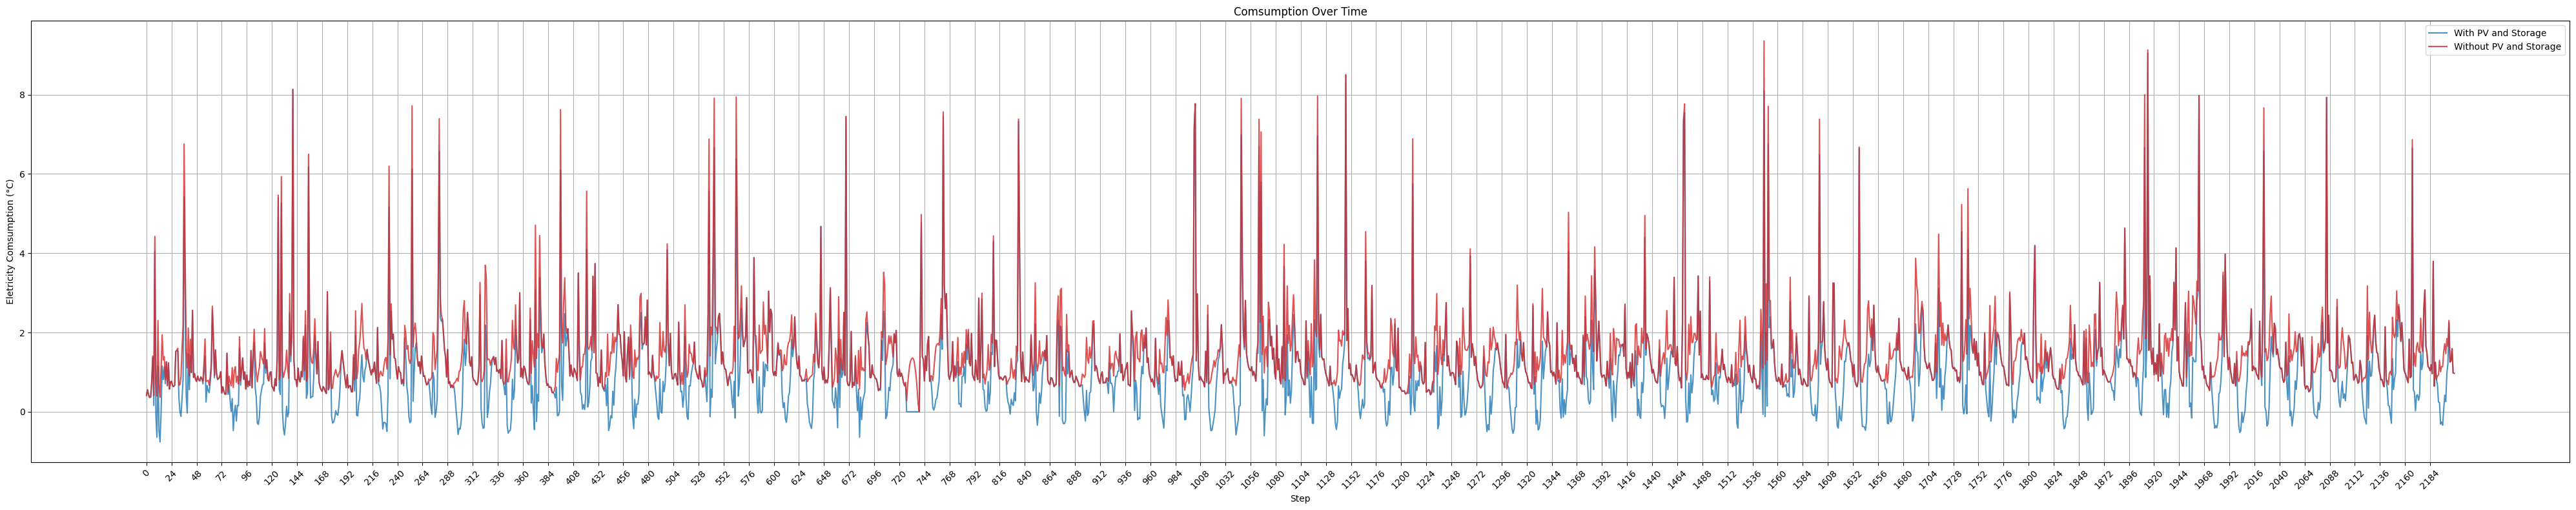

In [ ]:
energy_with_pv= env.unwrapped.buildings[num_building].net_electricity_consumption
energy_without_pv = env.unwrapped.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plt.plot_comparison_two(
    energy_with_pv,
    energy_without_pv,
    ylabel='Eletricity Comsumption (°KWh)',
    title='Eletricity Comsumption (°KWh)',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

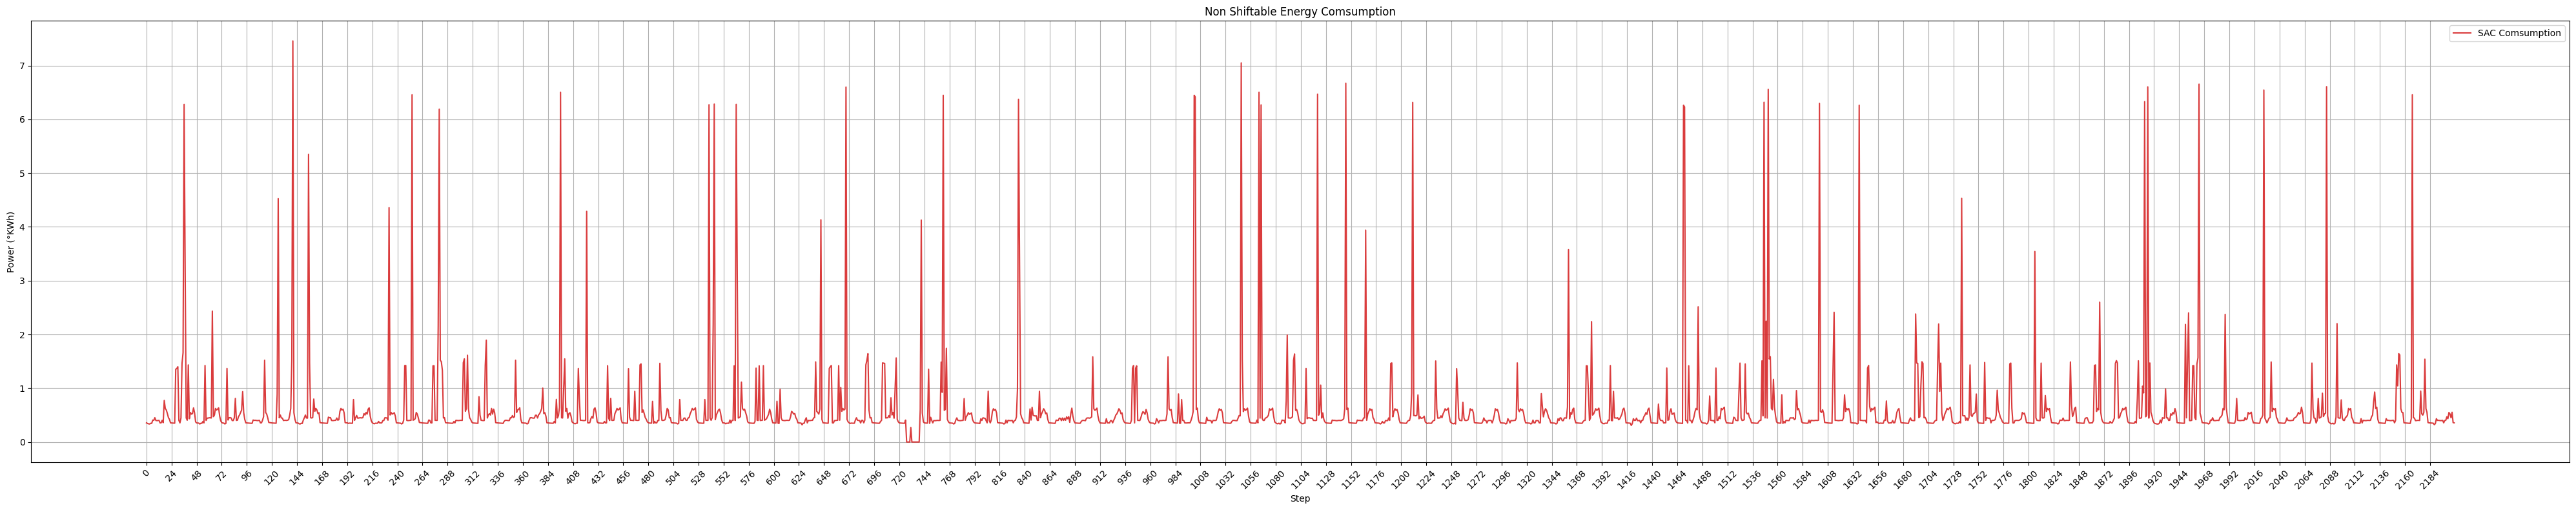

In [ ]:
non_energy = eval_env.buildings[num_building].non_shiftable_load_electricity_consumption

plt.plot_single_agent(
    non_energy,
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='SAC Comsumption',
)


------

## **Temperature behavior**

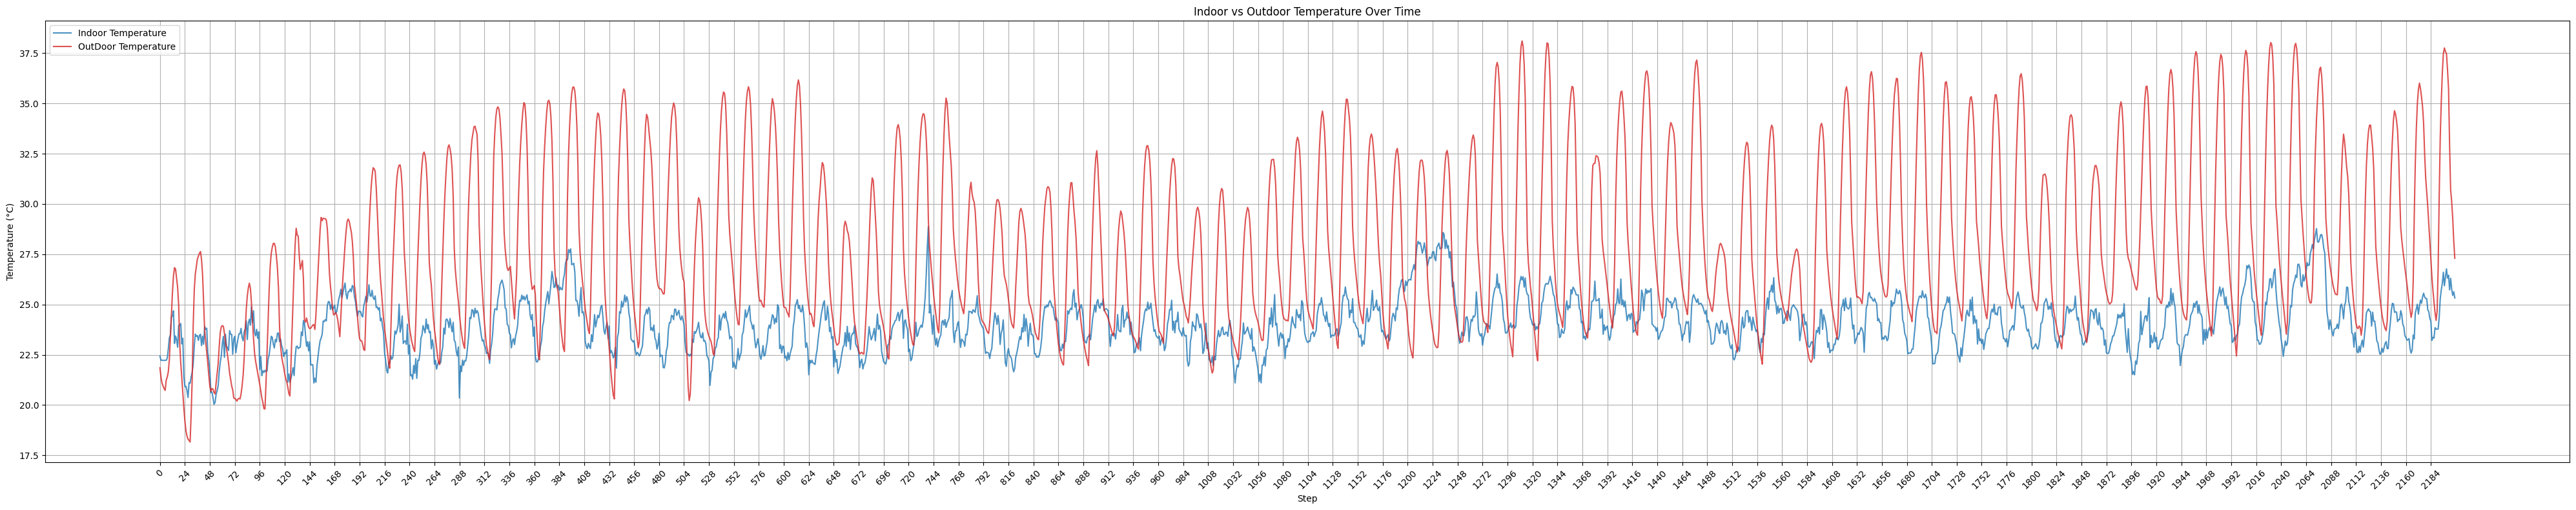

In [ ]:
indoor_base_temp = eval_env.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = eval_env.buildings[num_building].weather.outdoor_dry_bulb_temperature

plt.plot_comparison_two(
    indoor_base_temp,
    outdoor_temp,
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)

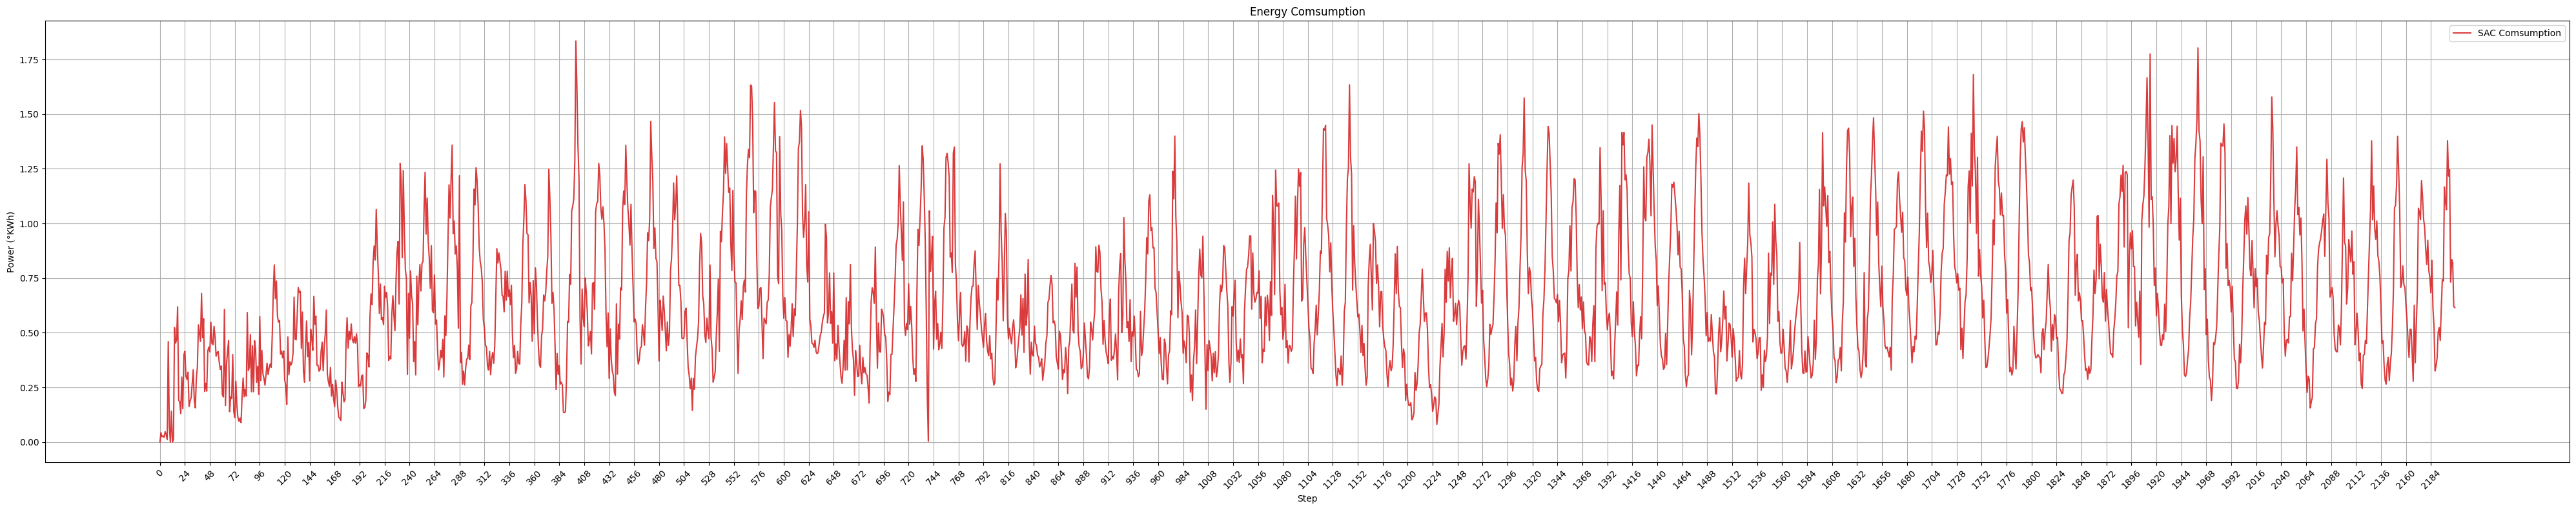

In [ ]:
cooler_energy = eval_env.buildings[num_building].cooling_electricity_consumption

plt.plot_single_agent(
    cooler_energy,
    ylabel='Power (°KWh)',
    title='Cooling Energy Comsumption',
    label='SAC Comsumption',
)


----

## **Batteries and accumulators behavior**

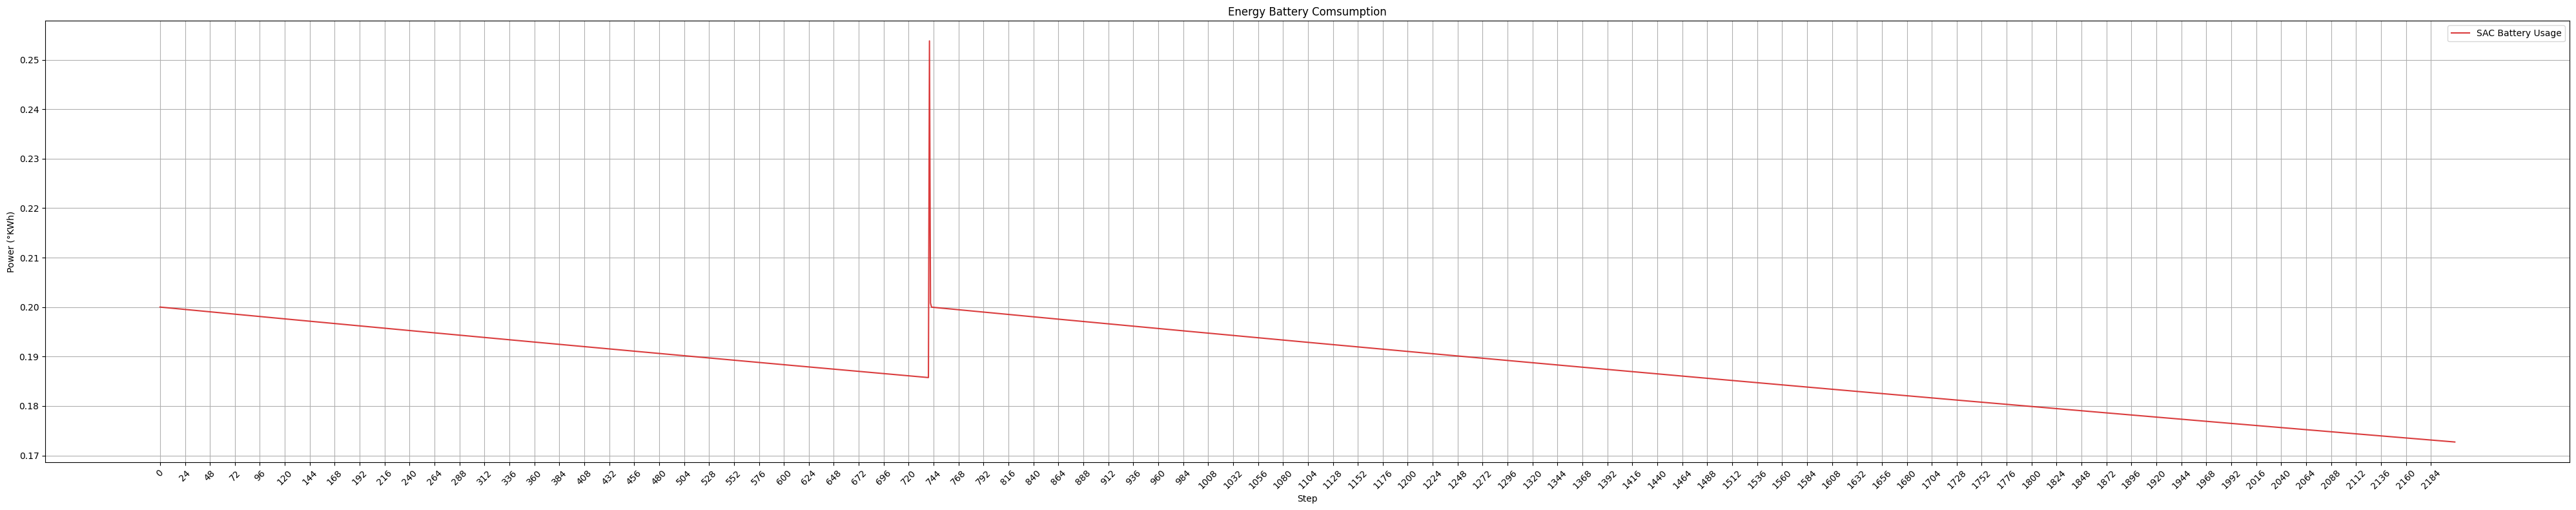

In [ ]:
agent_data1 = eval_env.buildings[num_building].electrical_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)

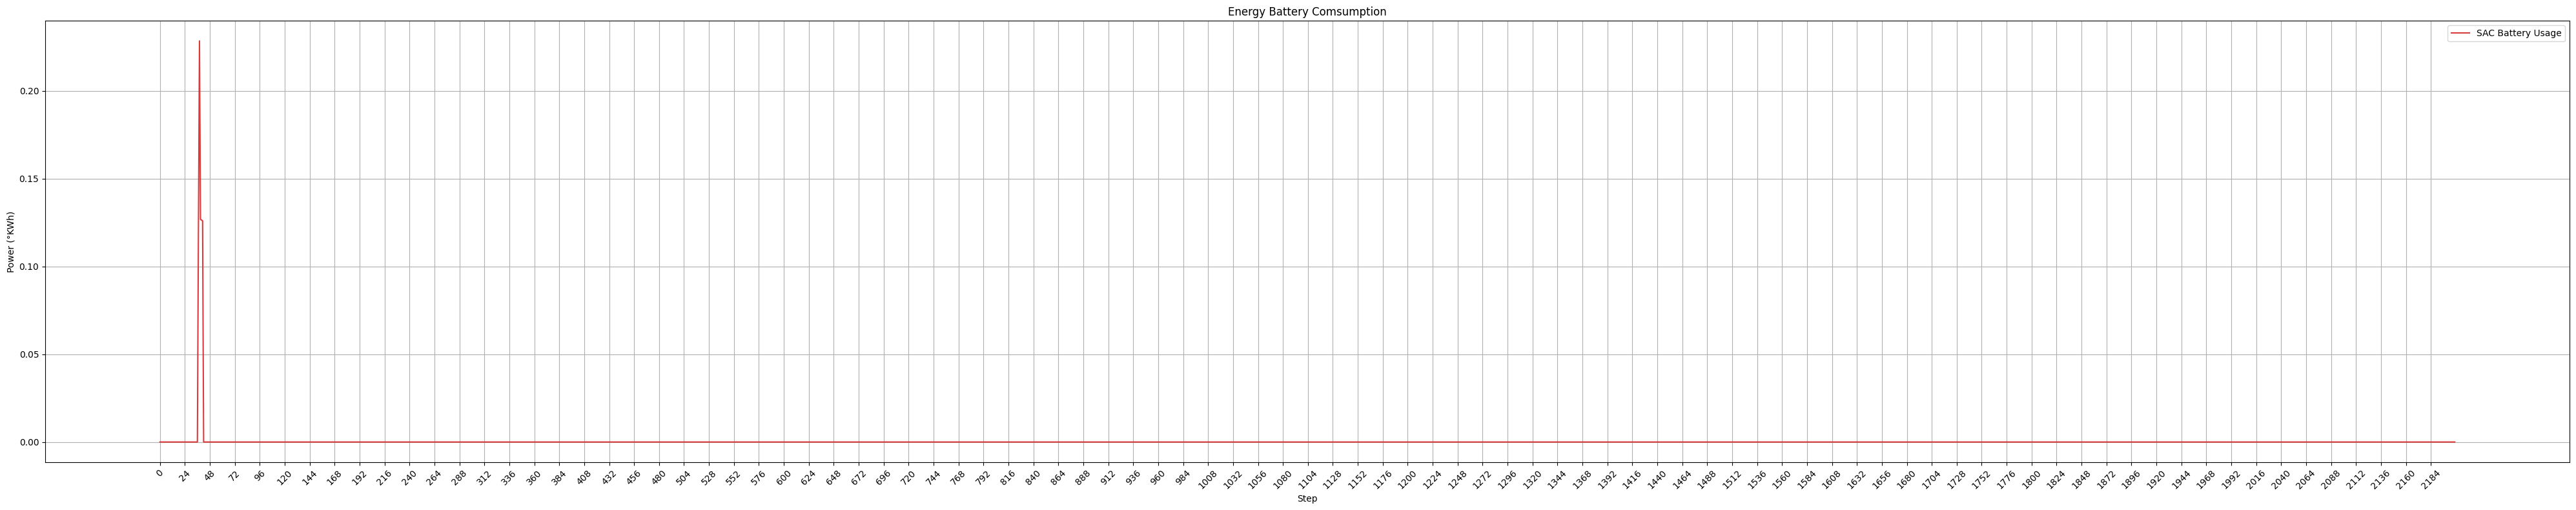

In [ ]:
agent_data1 = eval_env.buildings[num_building].dhw_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy DHW Accumulator Comsumption',
    label='DHW Usage'
)


----

## **Emissions behavior**


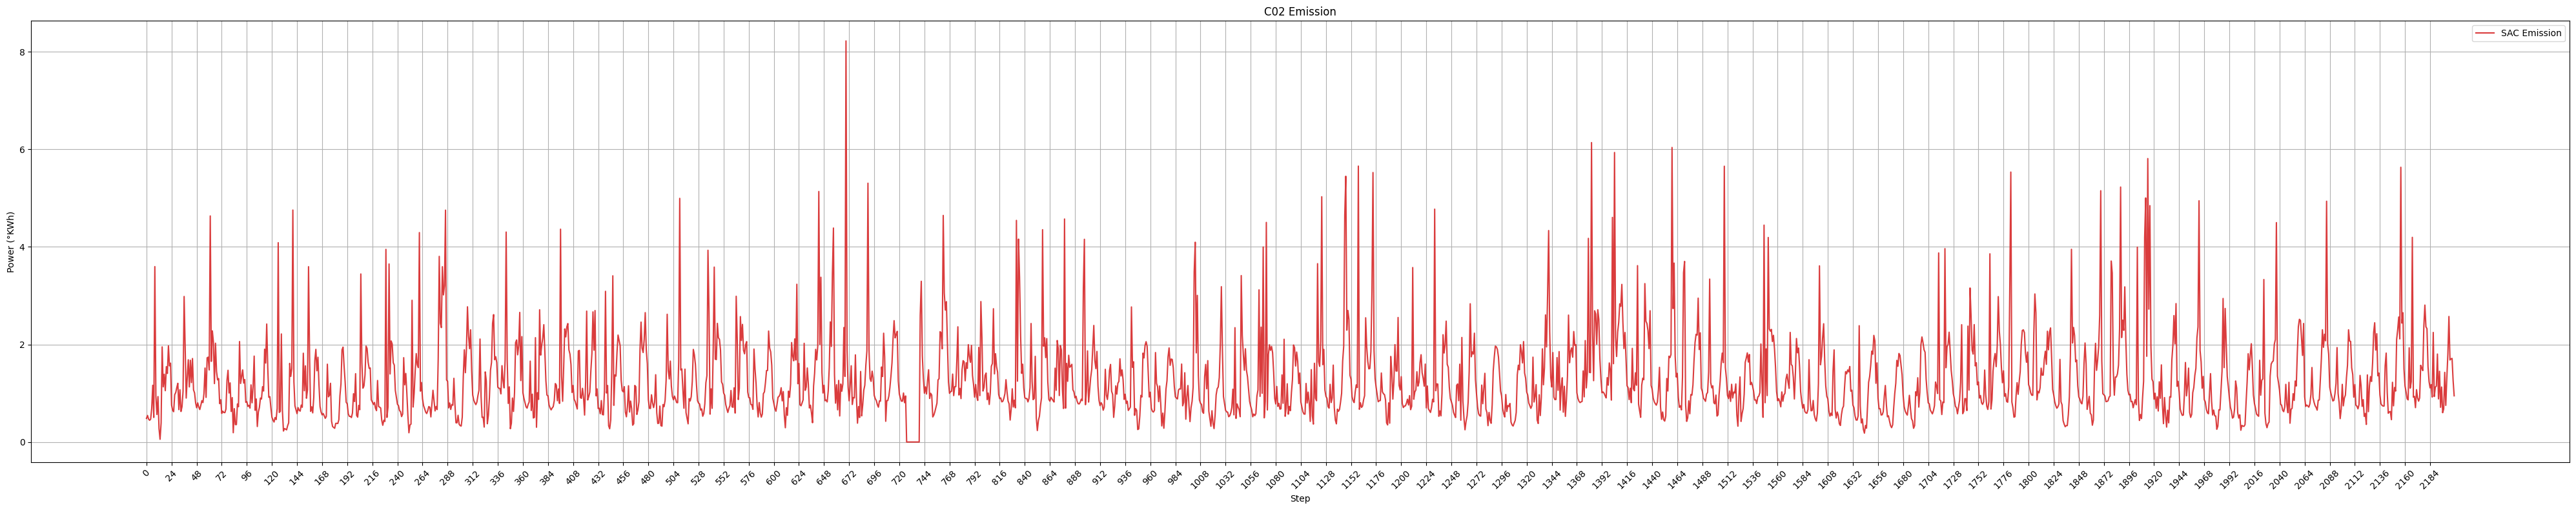

In [ ]:
agent_data1 = eval_env.net_electricity_consumption_emission

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='SAC Emission'
)

---
## **Learning metrics**

,Episodio,Reward Min,Reward Max,Reward Somma,Reward Media
0,1,-80.074402,0.000000,-29443.222656,-13.340835
1,2,-54.547012,-0.459654,-21130.220703,-9.574183
2,3,-48.047295,0.000000,-21308.849609,-9.655120
3,4,-47.494267,0.000000,-20665.019531,-9.363398
4,5,-50.097034,0.000000,-21348.529297,-9.673099
5,6,-50.093948,0.000000,-21174.585938,-9.594284
6,7,-49.517365,0.000000,-20415.976562,-9.250556
7,8,-50.786880,0.000000,-21354.742188,-9.675914
8,9,-44.141125,0.000000,-19641.906250,-8.899821
9,10,-45.166485,0.000000,-19081.261719,-8.645791


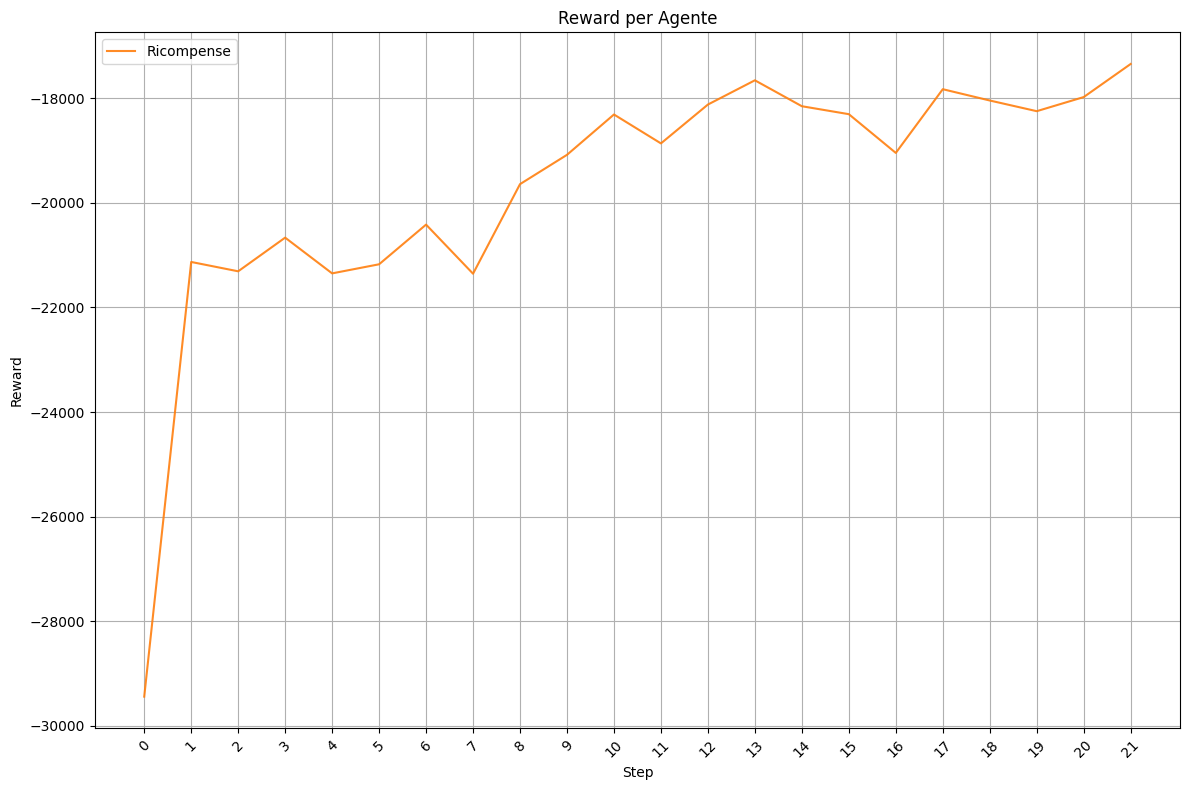

In [ ]:
df = plt.create_episode_table(eval_env.episode_rewards)

display(Markdown(f"### **SAC - Base Version**"))
display(Markdown("----"))
display(df)

plt.plot_rewards(df['Reward Sum'])

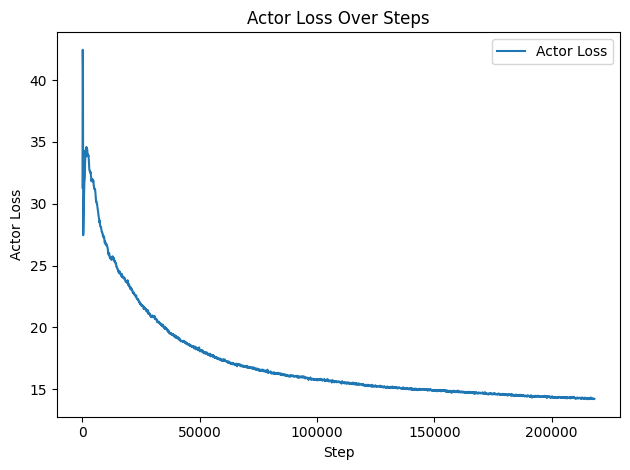

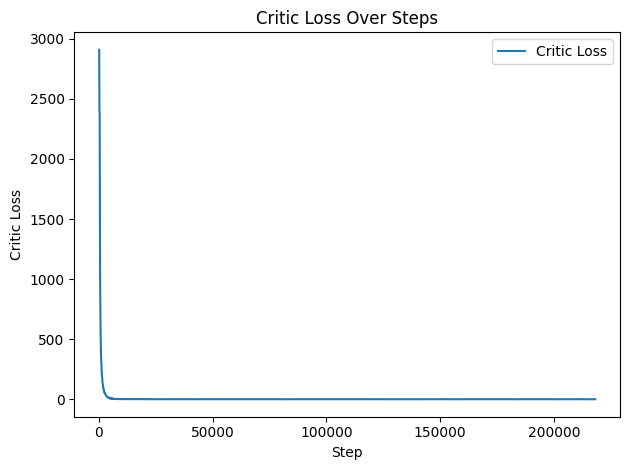

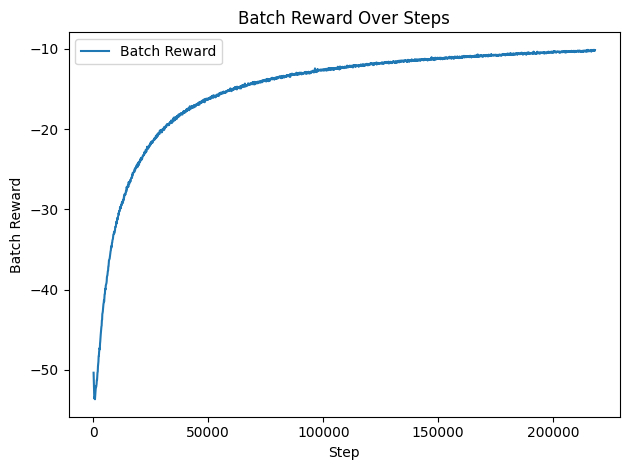

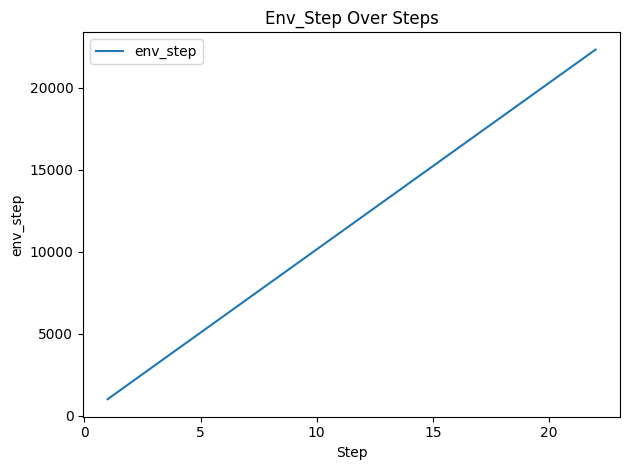

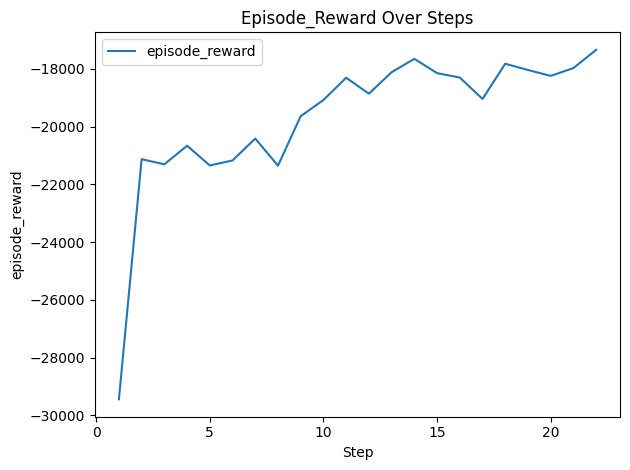

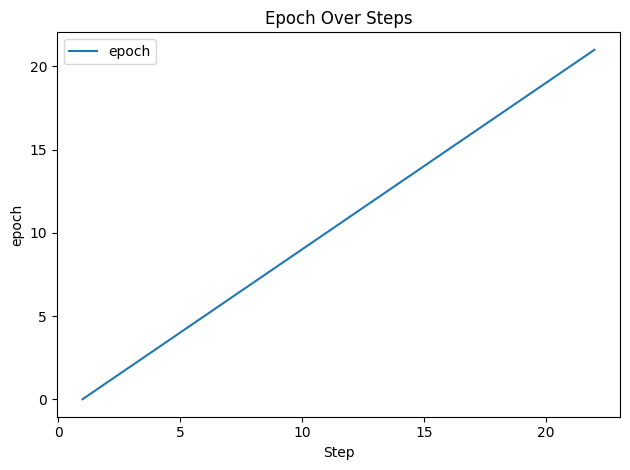

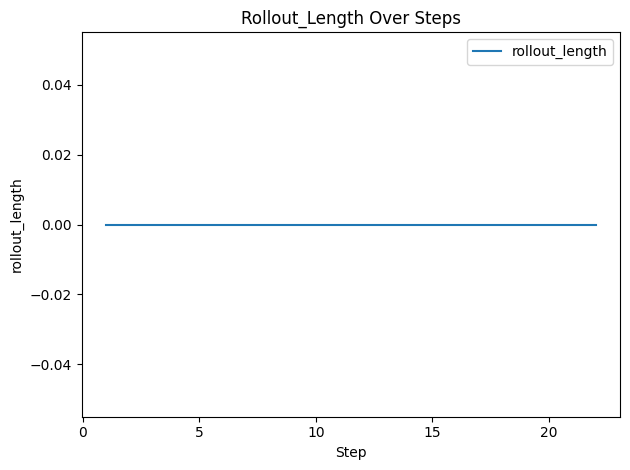

In [ ]:
plt.plot_learning_metrics(os.getcwd()+"/exp/sac")